<a href="https://colab.research.google.com/github/alejandromunizsiques/Nuevo-repositorio/blob/main/M%C3%A9tricas_de_clasificaci%C3%B3n_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripcion de tarea

Usaremos este conjunto de datos. Los datos, que fueron modificados a partir de esta fuente, contienen información sobre campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. El objetivo es predecir si el cliente se suscribirá (sí: 1 o no: 0) a un depósito a plazo (la columna de destino se llama 'y_yes' en este csv).

Tu tarea es construir un modelo de regresión logística para predecir si un cliente se suscribirá o no. Ajusta los hiperparámetros para obtener el mejor modelo posible. Luego, calcula las siguientes métricas de clasificación:

Métricas para calcular:

Precisión
Sensibilidad
Especificidad
AUC ROC
Además, grafica la República de China.

# Importacion de librerias

In [41]:
!pip install klib
!pip install --upgrade klib
import klib as klib
import pandas as pd
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sb

# Montaje de dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/Introducción al Machine Learning/bank_modified.csv')
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


# Matriz de features, target y separacion de entrenamiento

In [26]:
X = df.drop(["y_yes"],axis = 1)

y = df["y_yes"]



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.70, random_state=1, stratify= y)


ScalerX = StandardScaler().fit(X_train)
X_train = ScalerX.transform(X_train)
X_test = ScalerX.transform(X_test)




# Regresion logistica

# ParamGrid

In [27]:
param_grid = [
    {'penalty': ['l1'] , 'solver': ['liblinear', 'saga'], 'C': [100, 50, 20, 10, 5, 1, 0.5, 0.3, 0.2, 0.1]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': [100, 50, 20, 10, 5, 1, 0.5, 0.3, 0.2, 0.1]},
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'], 'C': [100, 50, 20, 10, 5, 1, 0.5, 0.3, 0.2, 0.1]},
    {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}, 
 ]


# Gridsearch y Crossvalidation

In [30]:
reglog = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, scoring = 'accuracy', cv=10) 

reglog.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 740.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1473, in fit
    % self.l1_ratio
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_sea

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [100, 50, 20, 10, 5, 1, 0.5, 0.3, 0.2, 0.1],
                          'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
                         {'C': [100, 50, 20, 10, 5, 1, 0.5, 0.3, 0.2, 0.1],
                          'penalty': ['elasticnet'], 'solver': ['saga']},
                         {'C': [100, 50, 20, 10, 5, 1, 0.5, 0.3, 0.2, 0.1],
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
                         {'penalty': ['none'],
                          'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}],
             scoring='accuracy')

In [32]:
print("Mejor score (accuracy): ", reglog.best_score_)
print("Mejores hiperparámetros: ", reglog.best_params_)
print("Mejor modelo: ", reglog.best_estimator_)

best_model = reglog.best_estimator_

Mejor score (accuracy):  0.8997167755991284
Mejores hiperparámetros:  {'C': 0.2, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor modelo:  LogisticRegression(C=0.2, penalty='l1', solver='liblinear')


# Re entrenamineto

In [47]:
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2800
           1       0.52      0.23      0.32       365

    accuracy                           0.89      3165
   macro avg       0.71      0.60      0.63      3165
weighted avg       0.86      0.89      0.87      3165



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


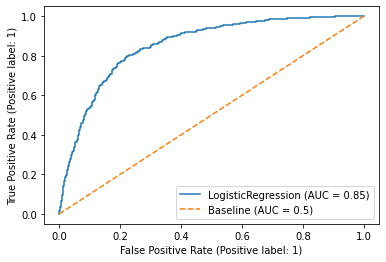

In [48]:
plot_roc_curve(best_model, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();